<a href="https://colab.research.google.com/github/farhanwew/GI-polyp/blob/main/Yolo8/%201.%20First%20Attempt%20-%20Notebook_Gastrointestinal_endoscopy_polyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
import kagglehub
from google.colab import userdata
username = userdata.get('KAGGLE_USERNAME')
key = userdata.get('KAGGLE_KEY')
%env KAGGLE_USERNAME=$username
%env KAGGLE_KEY=$key

In [ ]:
!kaggle datasets download farhanwew/gastrointestinal-endoscopy-polyp-dataset

Dataset URL: https://www.kaggle.com/datasets/farhanwew/gastrointestinal-endoscopy-polyp-dataset
License(s): unknown
 98% 593M/605M [00:01<00:00, 292MB/s]
100% 605M/605M [00:01<00:00, 393MB/s]


In [ ]:
%pip install -q dagshub 'mlflow>=2,<3'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.3/261.3 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 142.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8

In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.8 MB/s eta 0:00:00


In [ ]:
%%capture
!unzip /content/gastrointestinal-endoscopy-polyp-dataset.zip

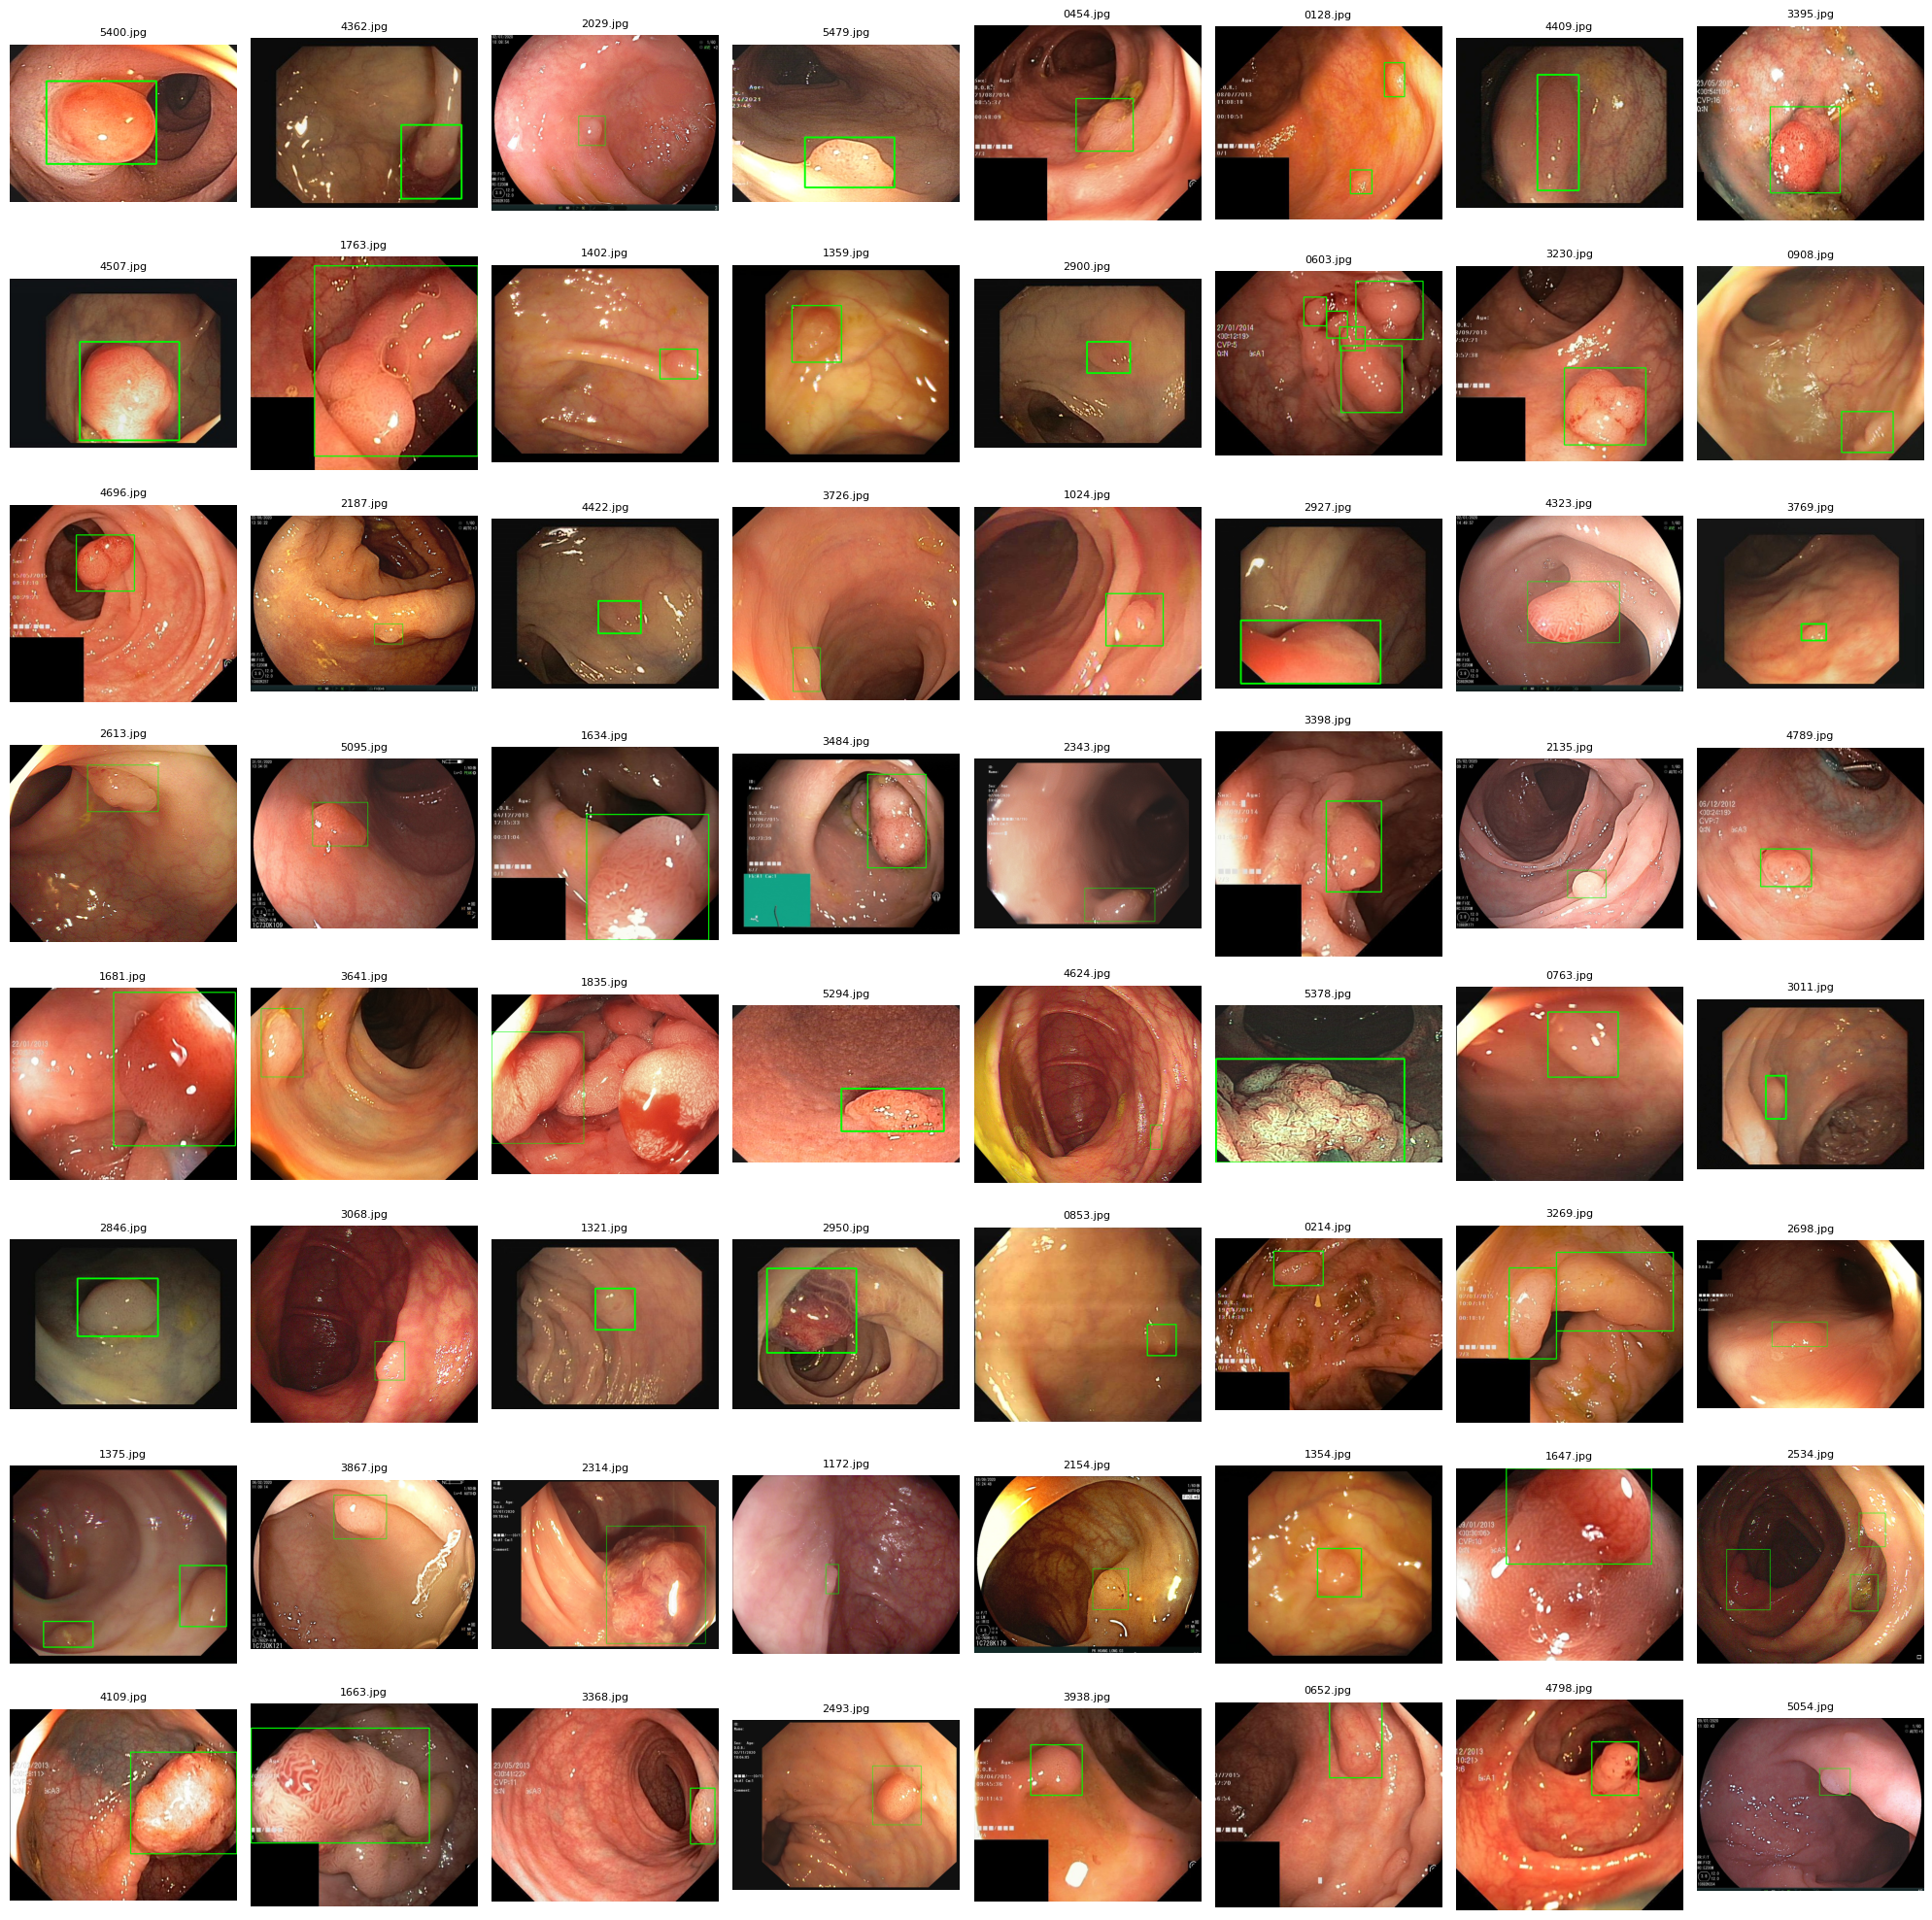

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# === Paths ===
img_dir = "/content/Gastrointestinal endoscopy polyp dataset/Polyp-Images"
label_dir = "/content/Gastrointestinal endoscopy polyp dataset/TXT-Labels"

# === Ambil daftar gambar ===
images = [f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random.shuffle(images)

# === Pilih 64 gambar secara acak ===
sample_images = images[:64]

# === Fungsi untuk menggambar bounding box YOLO ===
def draw_yolo_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    h, w, _ = img.shape
    if not os.path.exists(label_path):
        return img

    with open(label_path, "r") as f:
        for line in f:
            cls, x_center, y_center, bw, bh = map(float, line.strip().split())
            x_center, y_center, bw, bh = x_center * w, y_center * h, bw * w, bh * h
            x1 = int(x_center - bw / 2)
            y1 = int(y_center - bh / 2)
            x2 = int(x_center + bw / 2)
            y2 = int(y_center + bh / 2)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# === Plot 8x8 grid ===
plt.figure(figsize=(20, 20))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(img_dir, img_name)
    label_path = os.path.join(label_dir, os.path.splitext(img_name)[0] + ".txt")
    img = draw_yolo_boxes(img_path, label_path)
    if img is not None:
        plt.subplot(8, 8, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(os.path.basename(img_name), fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
import os, shutil, random

# Path dataset asli
base = "/content/Gastrointestinal endoscopy polyp dataset"
images_dir = os.path.join(base, "Polyp-Images")
labels_dir = os.path.join(base, "TXT-Labels")

# Path dataset baru
splits = ["train", "val", "test"]
for split in splits:
    os.makedirs(os.path.join(base, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(base, split, "labels"), exist_ok=True)

# Ambil semua file gambar
images = [f for f in os.listdir(images_dir) if f.endswith(".jpg")]
random.shuffle(images)

# Rasio pembagian
train_split = 0.7   # 70% train
val_split   = 0.2   # 20% val
test_split  = 0.1   # 10% test

n = len(images)
train_idx = int(n * train_split)
val_idx   = train_idx + int(n * val_split)

# Bagi dataset
for i, img_name in enumerate(images):
    src_img = os.path.join(images_dir, img_name)
    src_lbl = os.path.join(labels_dir, img_name.replace(".jpg", ".txt"))

    if i < train_idx:
        dst_img, dst_lbl = "train/images", "train/labels"
    elif i < val_idx:
        dst_img, dst_lbl = "val/images", "val/labels"
    else:
        dst_img, dst_lbl = "test/images", "test/labels"

    shutil.copy(src_img, os.path.join(base, dst_img, img_name))
    shutil.copy(src_lbl, os.path.join(base, dst_lbl, img_name.replace(".jpg", ".txt")))

print("✅ Dataset dibagi jadi Train/Val/Test")

✅ Dataset dibagi jadi Train/Val/Test


In [ ]:
%%writefile data.yaml

train: /content/Gastrointestinal endoscopy polyp dataset/train/images
val: /content/Gastrointestinal endoscopy polyp dataset/val/images
test: /content/Gastrointestinal endoscopy polyp dataset/test/images

nc: 1
names: ['polyp']

Writing data.yaml


In [ ]:
! yolo settings mlflow=True

✅ Updated 'mlflow=True'
JSONDict("/root/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/content/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": false,
  "wandb": false,
  "vscode_msg": true,
  "openvino_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


In [ ]:
import dagshub
dagshub.init(repo_owner='farhanwew', repo_name='polyp-object-detection', mlflow=True)

Initialized MLflow to track repo "farhanwew/polyp-object-detection"

Repository farhanwew/polyp-object-detection initialized!

In [ ]:
!yolo detect train \
  data="/content/data.yaml" \
  model=yolov8n.pt \
  epochs=1 \
  imgsz=640 \
  batch=32 \
  name=Percobaan_1 \
  project= Model_yolo_8

Ultralytics 8.3.207 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Percobaan_1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, 

In [ ]:
# ========================================
# 2. Inference Test Set
# ========================================
from ultralytics import YOLO
import cv2, os, glob
import numpy as np
import pandas as pd
import mlflow

BASE = "/content/Gastrointestinal endoscopy polyp dataset"
TEST_IM_DIR  = os.path.join(BASE, "test/images")
TEST_LBL_DIR = os.path.join(BASE, "test/labels")
OUT_DIR      = "/content/test_inference_overlay"
CSV_FILE     = "/content/test_metrics.csv"

os.makedirs(OUT_DIR, exist_ok=True)

# Load model terbaik
model = YOLO("Model_yolo_8/Percobaan_1/weights/best.pt")

# Jalankan inference
test_images = sorted(
    [p for ext in ("*.jpg","*.jpeg","*.png") for p in glob.glob(os.path.join(TEST_IM_DIR, ext))]
)
results = model.predict(source=test_images, imgsz=640, conf=0.25, iou=0.5, verbose=False)

# ========================================
# 3. Hitung metric per-gambar + overlay
# ========================================
def box_iou(a, b):
    if len(a)==0 or len(b)==0:
        return np.zeros((len(a), len(b)))
    ious = np.zeros((len(a), len(b)))
    a_areas = (a[:,2]-a[:,0]) * (a[:,3]-a[:,1])
    b_areas = (b[:,2]-b[:,0]) * (b[:,3]-b[:,1])
    for i in range(len(a)):
        ax1, ay1, ax2, ay2 = a[i]
        inter_x1 = np.maximum(ax1, b[:,0])
        inter_y1 = np.maximum(ay1, b[:,1])
        inter_x2 = np.minimum(ax2, b[:,2])
        inter_y2 = np.minimum(ay2, b[:,3])
        inter_w  = np.maximum(0, inter_x2 - inter_x1)
        inter_h  = np.maximum(0, inter_y2 - inter_y1)
        inter    = inter_w * inter_h
        union    = a_areas[i] + b_areas - inter
        ious[i]  = np.where(union > 0, inter/union, 0.0)
    return ious

rows = []
for res in results:
    img = cv2.imread(res.path)
    h, w = img.shape[:2]

    # Prediksi dari YOLO
    pred_xyxy = res.boxes.xyxy.cpu().numpy() if res.boxes is not None else np.zeros((0,4))
    confs     = res.boxes.conf.cpu().numpy() if res.boxes is not None else np.zeros((0,))
    classes   = res.boxes.cls.cpu().numpy().astype(int) if res.boxes is not None else np.zeros((0,))

    # Ground truth dari label
    gt_file = os.path.join(TEST_LBL_DIR, os.path.splitext(os.path.basename(res.path))[0] + ".txt")
    gts = []
    if os.path.exists(gt_file):
        for line in open(gt_file):
            cls, xc, yc, bw, bh = map(float, line.strip().split())
            x1, y1 = (xc-bw/2)*w, (yc-bh/2)*h
            x2, y2 = (xc+bw/2)*w, (yc+bh/2)*h
            gts.append([x1,y1,x2,y2])
    gt_xyxy = np.array(gts)

    # Matching by IoU
    iou_mat = box_iou(pred_xyxy, gt_xyxy)
    TP = sum(iou_mat.max(axis=1) >= 0.5) if len(pred_xyxy)>0 else 0
    FP = len(pred_xyxy) - TP
    FN = len(gt_xyxy) - TP

    prec = TP / (TP+FP) if (TP+FP)>0 else 0
    rec  = TP / (TP+FN) if (TP+FN)>0 else 0
    f1   = 2*prec*rec/(prec+rec) if (prec+rec)>0 else 0

    rows.append({
        "image": os.path.basename(res.path),
        "num_gt": len(gt_xyxy),
        "num_pred": len(pred_xyxy),
        "TP": TP, "FP": FP, "FN": FN,
        "precision": prec, "recall": rec, "f1": f1
    })

    # Overlay prediksi (merah)
    for (x1,y1,x2,y2), c in zip(pred_xyxy, confs):
        cv2.rectangle(img, (int(x1),int(y1)), (int(x2),int(y2)), (0,0,255), 2)
        cv2.putText(img, f"Pred {c:.2f}", (int(x1),int(y1)-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)

    # Overlay GT (hijau)
    for (x1,y1,x2,y2) in gt_xyxy:
        cv2.rectangle(img, (int(x1),int(y1)), (int(x2),int(y2)), (0,255,0), 2)
        cv2.putText(img, "GT", (int(x1),int(y1)-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

    cv2.imwrite(os.path.join(OUT_DIR, os.path.basename(res.path)), img)

# ========================================
# 4. Simpan CSV + Log ke MLflow
# ========================================
df = pd.DataFrame(rows)
df.to_csv(CSV_FILE, index=False)
print("✅ CSV metric per-image:", CSV_FILE)
print("✅ Overlay images:", OUT_DIR)

mlflow.set_experiment("Model_yolo_8")
with mlflow.start_run(run_name="inference-test-percobaan_1"):
    mlflow.log_artifact(CSV_FILE)
    mlflow.log_artifacts(OUT_DIR, artifact_path="overlay")
print("📦 Metrics + Overlay dilog ke MLflow")

✅ CSV metric per-image: /content/test_metrics.csv
✅ Overlay images: /content/test_inference_overlay
🏃 View run inference-test-percobaan_1 at: https://dagshub.com/farhanwew/polyp-object-detection.mlflow/#/experiments/0/runs/f4b5020eb8af4e7db5d7a2c70cff75e1
🧪 View experiment at: https://dagshub.com/farhanwew/polyp-object-detection.mlflow/#/experiments/0
📦 Metrics + Overlay dilog ke MLflow
